### ANALISA DATA DAFTAR LANGGANAN PERLU DIPERHATIKAN (DLPD) TERHADAP JUMLAH TEMUAN PELANGGARAN PEMAKAIAN TENAGA LISTRIK (P2TL) ###

**Kelompok 5:**
23522307 : Edy Sucipto
23522308 : Sandhi Ading Wasana
23522312 : Ardik Crisdianto

* Setiap bulan PLN memiliki data DLPD yang dapat diunduh sesuai dengan bulan terbitnya rekening listrik pelanggan setiap bulan. Dan sebagai tindaklanjut DLPD tersebut, petugas PLN melakukan pengecekan ke lokasi pelanggan. Kegiatan ini rutin dilakukan setiap bulan. Namun hal ini dirasa kurang efektif, karena tidak semua DLPD merupakan fraud. Oleh karena itu model yang dibangun adalah membantu mencari DLPD yang berpotensi melakukan fraud/normal/tidak terpakai.
* DLPD dikelompokkan menjadi beberapa kategori anomali pelanggan antara lain:
  1. KWH < 40 JAM NYALA : Jam Nyala Maksimum perbulan adalah 24 Jam x 30 Hari = 270 Jam Nyala. Data yang ditampilkan adalah yang kurang dari 40 Jam Nyala per bulan dimana pemakaian kWh pelanggan termasuk kecil.
  2. KWH < 50% DARI RATA-RATA : Total pemakaian energi listrik pelanggan Lebih Kecil dari 50% rata-rata bulanan
  3. KWH > 50% DARI RATA-RATA : Total pemakaian energi listrik pelanggan Lebih Besar dari 50% rata-rata bulanan
  4. REKENING PECAHAN : Rekening yang timbul akibat perubahan daya. Perhitungan Rp/kWh daya lama dan Rp/kWh daya baru dihitung secara akurat sesuai dengan angka meter pada saat pergantian daya di lokasi rumah pelanggan.
  5. KWH NOL : Terjadi jika angka meter bulan sebelumnya dan angka meter saat pembacaan saat ini tidak ada pergerakan/NOL. Mengindikasikan rumah kosong, kwh macet/rusak, dsb.
  6. STAND METER MUNDUR : Angka meter bulan lalu lebih besar daripada angka meter bulan saat ini.
  7. KWH MAXIMUM : Pemakaian kWh terlalu tinggi. Terjadi pada pelanggan dengan Jam Nyala lebih dari 720 Jam Nyala per bulan.

* Data yang digunakan adalah data bulan Januari sampai dengan Juni 2023
* Kedua data tersebut (Data DLPD dan Data Hasil Pengecekan Petugas Lapangan) digabung kedalam satu dataset yang dinamakan "DLPD jan-jun 2023 rev.csv" yang dapat di download di https://github.com/wyzola/TUGAS_BESAR_IF5171-adingw/blob/main/DATASET_masedy/DLPD%20jan-jun%202023%20rev.csv . Atau https://raw.githubusercontent.com/wyzola/TUGAS_BESAR_IF5171-adingw/main/DATASET_masedy/DLPD%20jan-jun%202023%20rev.csv






In [1]:
# Import library and modules
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report

In [2]:
# Load dataset and read CSV file from Github
url = 'https://raw.githubusercontent.com/wyzola/TUGAS_BESAR_IF5171-adingw/main/DATASET_masedy/DLPD%20jan-jun%202023%20rev.csv'

# Memuat file CSV dari URL
data = pd.read_csv(url, sep = ';')

# Menampilkan beberapa baris pertama dari dataframe
data.head()

C:\Users\ading\AppData\Local\Temp\ipykernel_24992\1305750718.py:5: DtypeWarning: Columns (70) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, sep = ';')


,THBLREK,IDPEL,NAMA,ALAMAT,NOBANG,KETNOBANG,RT,NODLMRT,KETNODLMRT,RW,...,DLPD_FKM,DLPD_KVARH,DLPD_3BLN,DLPD_JNSMUTASI,DLPD_TGLBACA,ALASAN_KOREKSI,JAMNYALA600,JAMNYALA400,RAW LABEL,LABEL
0,202301,511401149760,PERUMNAS,PR MANUKAN MLY 7 9 B,20,,,0,,2,...,FAKTOR KALI METER = FAKTOR KALI KVARH,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,TANGGAL BACA <= TANGGAL 1 BULAN REKENING,NaN,<= 600,<= 400,STAND ANGKA KWH METER MACET,PELANGGARAN
1,202301,511403427227,GATOT PRATOMO,JL DONOWATI 4A,4,C,6,,,1,...,FAKTOR KALI METER = FAKTOR KALI KVARH,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,TANGGAL BACA <= TANGGAL 1 BULAN REKENING,NaN,<= 600,<= 400,BAIK,BAIK
2,202301,511402835467,JAUDIN SIMANJORANG,JL CANDI LONTAR 42L,15,,,0,,8,...,FAKTOR KALI METER = FAKTOR KALI KVARH,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,TANGGAL BACA <= TANGGAL 1 BULAN REKENING,NaN,<= 600,<= 400,BAIK,BAIK
3,202301,511402586756,RIKUSUMAKARTIKA INTN,JL CANDI LONTAR 42L,9,,,0,,8,...,FAKTOR KALI METER = FAKTOR KALI KVARH,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,TANGGAL BACA <= TANGGAL 1 BULAN REKENING,NaN,<= 600,<= 400,BAIK,BAIK
4,202301,511401852161,PERUMAHAN UKA,PR UKA DS SEMEMI 4,20,,6,NaN,,2,...,FAKTOR KALI METER = FAKTOR KALI KVARH,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,TANGGAL BACA <= TANGGAL 1 BULAN REKENING,NaN,<= 600,<= 400,"BAIK (32770/0,12)",BAIK


In [3]:
# Get the dimension (number of rows and columns)
data.shape

(19456, 75)

# DATA PREPROCESSING

## DROP COLUMN

In [ ]:
# Define the columns to be dropped
columns_to_drop = ["THBLREK", "IDPEL", "NAMA", "ALAMAT", "NOBANG", "KETNOBANG", "RT", "NODLMRT", "KETNODLMRT", "RW", "KODEPOS", "SUBKOGOL", "RAW LABEL"]

# Drop the specified columns
data.drop(columns_to_drop, axis=1, inplace=True)

In [4]:
# Select specific columns from DataFrame "data"
data = data[['KDGARDU','NAMAGARDU','KDDK','UNITUP','TARIF','DAYA','KDPROSESKLP','RPPTL','RPPPN','RPBPJU','RPANGSA','RPANGSB','RPANGSC','RPMAT','RPPLN','RPTAG','RPBK1','RPBK2','RPBK3','SLALWBP','SAHLWBP_CABUT','SLALWBP_PASANG','SAHLWBP','PEMKWH','JAMNYALA','PEMDA','KOGOL','TGLCABUTPASANG','DLPD','DLPD_LM','DLPD_KVARH','DLPD_3BLN','DLPD_JNSMUTASI','JAMNYALA600','JAMNYALA400','LABEL']]
data.head(3)

,KDGARDU,NAMAGARDU,KDDK,UNITUP,TARIF,DAYA,KDPROSESKLP,RPPTL,RPPPN,RPBPJU,...,KOGOL,TGLCABUTPASANG,DLPD,DLPD_LM,DLPD_KVARH,DLPD_3BLN,DLPD_JNSMUTASI,JAMNYALA600,JAMNYALA400,LABEL
0,GD511400007,BB076,BBABACA20300,51140,R1M,900,51SBSH1,48672,0,3894,...,0,20211209,C KWH < 40 JAM,K KWH NOL,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,<= 600,<= 400,PELANGGARAN
1,GD511400168,BB249,BBABAHB05500,51140,R1,1300,51SBSH1,79459,0,6357,...,0,20070321,C KWH < 40 JAM,N KWH N O R M A L,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,<= 600,<= 400,BAIK
2,GD511401003,BB213,BBADAGA07200,51140,R1,1300,51SBSH1,75124,0,6010,...,0,20071217,C KWH < 40 JAM,C KWH < 40 JAM,KVARH PAKAI < KWH PAKAI,<= 50% RATA2 3 BULAN,TANPA PECAHAN,<= 600,<= 400,BAIK


In [5]:
# Get the dimension (number of rows and columns)
data.shape

(19456, 36)

In [6]:
# Define a threshold for null values
threshold = 0.6  # Columns with 60% or more null values will be dropped

# Calculate the percentage of null values in each column
null_percentages = data.isnull().sum() / len(data)
columns_to_drop = null_percentages[null_percentages >= threshold].index

# Drop columns with 60% or more null values
data.drop(columns=columns_to_drop, inplace=True)

In [10]:
# Get the dimension (number of rows and columns)
data.shape

(19456, 36)

In [11]:
# Identify columns with only one unique value
columns_with_one_value = data.columns[data.nunique() == 1]

# Drop identified columns
data.drop(columns=columns_with_one_value, inplace=True)

In [12]:
# Get the dimension (number of rows and columns)
data.shape

(19456, 36)

In [13]:
# Check missing values in each column of the DataFrame 'data'
data.isna().sum()

KDGARDU           0
NAMAGARDU         0
KDDK              0
UNITUP            0
TARIF             0
DAYA              0
KDPROSESKLP       0
RPPTL             0
RPPPN             0
RPBPJU            0
RPANGSA           0
RPANGSB           0
RPANGSC           0
RPMAT             0
RPPLN             0
RPTAG             0
RPBK1             0
RPBK2             0
RPBK3             0
SLALWBP           0
SAHLWBP_CABUT     0
SLALWBP_PASANG    0
SAHLWBP           0
PEMKWH            0
JAMNYALA          0
PEMDA             0
KOGOL             0
TGLCABUTPASANG    0
DLPD              0
DLPD_LM           0
DLPD_KVARH        0
DLPD_3BLN         0
DLPD_JNSMUTASI    0
JAMNYALA600       0
JAMNYALA400       0
LABEL             0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


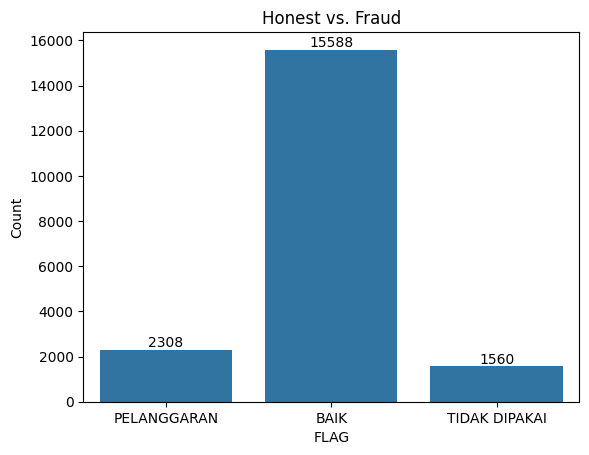

In [14]:
# Create a count plot using Seaborn to visualize the distribution of classes in the 'LABEL' column of the DataFrame 'data'
import matplotlib.pyplot as plt
ax = sns.countplot(x='LABEL', data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('FLAG')
plt.ylabel('Count')
plt.title('Honest vs. Fraud')
plt.legend(frameon=False)
plt.show()

Data with the BAIK label is not balanced with other labels, namely PELANGGARAN and TIDAK DIPAKAI. So Oversampling is done to balance the data.

In [15]:
# Retrieve the unique values in the 'LABEL' column of the DataFrame 'data'
data.LABEL.unique()

array(['PELANGGARAN', 'BAIK', 'TIDAK DIPAKAI'], dtype=object)

In [17]:
from imblearn.over_sampling import RandomOverSampler

# Set the sampling_strategy dictionary for imbalanced class sampling
sampling_strategy = {
    'PELANGGARAN': 15588,  # Adjust the number for 'Pelanggaran' class
    'BAIK': 15588,    # Adjust the number for 'Baik' class
    'TIDAK DIPAKAI': 15588 # Adjust the number for 'Tidak dipakai' class
}

# Initialize RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Separate features (X) and labels (y)
X = data.drop('LABEL', axis=1)
y = data['LABEL']

# Perform over-sampling
X_resampled, y_resampled = over_sampler.fit_resample(X, y)

In [18]:
import pandas as pd

# Convert X_resampled and y_resampled to DataFrames
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['LABEL'])

# Concatenate X_resampled and y_resampled DataFrames along columns (axis=1)
data = pd.concat([X_resampled_df, y_resampled_df], axis=1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


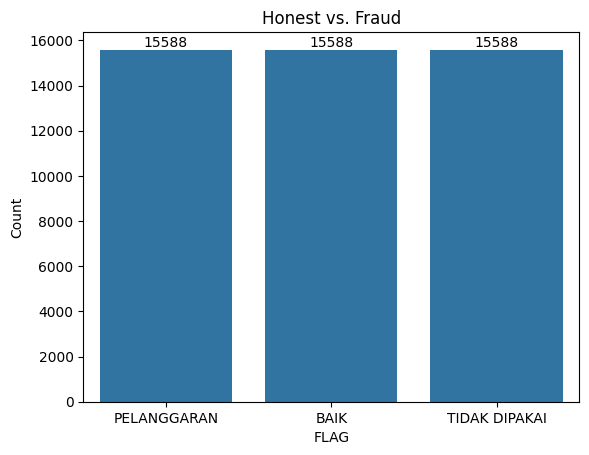

In [19]:
# Create a count plot using Seaborn to visualize the distribution of classes in the 'LABEL' column of the DataFrame 'data'
import matplotlib.pyplot as plt
ax = sns.countplot(x='LABEL', data=data)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('FLAG')
plt.ylabel('Count')
plt.title('Honest vs. Fraud')
plt.legend(frameon=False)
plt.show()

In [20]:
# Get the dimension (number of rows and columns)
data.shape

(46764, 36)

## LABEL MAP


In [21]:
'''
df_iris['species'] = df_iris['species'].astype('category')
species_map = list(df_iris['species'].cat.categories)
species_map
'''
#Converts the 'LABEL' column to a categorical data type
data['LABEL'] = data['LABEL'].astype('category')

#label_map will contain the unique values present in the 'LABEL' column
label_map = list(data['LABEL'].cat.categories)

label_map
#data

['BAIK', 'PELANGGARAN', 'TIDAK DIPAKAI']

## ENCODER

In [22]:
from sklearn.preprocessing import LabelEncoder

#Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for column in data.columns:
    # Check if the data type of the current column is 'object' (categorical)
    if data[column].dtype == 'object':
        # Apply label encoding to the column
        data[column] = label_encoder.fit_transform(data[column])


In [23]:
# Convert the 'LABEL' column to numerical codes using categorical accessor
data['LABEL'] = data['LABEL'].cat.codes

In [24]:
# display the first few rows of the DataFrame
data.head()

,KDGARDU,NAMAGARDU,KDDK,UNITUP,TARIF,DAYA,KDPROSESKLP,RPPTL,RPPPN,RPBPJU,...,KOGOL,TGLCABUTPASANG,DLPD,DLPD_LM,DLPD_KVARH,DLPD_3BLN,DLPD_JNSMUTASI,JAMNYALA600,JAMNYALA400,LABEL
0,12,25,318,51140,6,900,1,48672,0,3894,...,0,20211209,0,4,0,0,3,0,0,1
1,50,121,446,51140,5,1300,1,79459,0,6357,...,0,20070321,0,7,0,0,3,0,0,0
2,150,110,932,51140,5,1300,1,75124,0,6010,...,0,20071217,0,1,0,0,3,0,0,0
3,150,110,933,51140,7,4400,1,409587,0,32767,...,0,20081023,0,7,0,0,3,0,0,0
4,130,15,849,51140,6,900,1,48672,0,3894,...,0,20121002,0,7,0,0,3,0,0,0


In [26]:
# Creat correlation matrix with background_gradient
data.corr().style.background_gradient().set_precision(2)

AttributeError: 'Styler' object has no attribute 'set_precision'

# SPLIT DATA

In [27]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data.drop("LABEL", axis=1)
y = data["LABEL"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PROCESS TRAINING DAN TESTING

## RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a RandomForestClassifier instance
rf = RandomForestClassifier()

# Define hyperparameter grid for tuning (number of trees and maximum depth)
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 3]}

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
rf_grid_search = GridSearchCV(rf, rf_param_grid, scoring='recall_weighted', cv=5)

# Fit the RandomForestClassifier to the training data using grid search
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 3], 'n_estimators': [100, 200]},
             scoring='recall_weighted')

In [ ]:
# print parameter and score
print("Parameter: ", rf_grid_search.best_params_)
print("Score: ", rf_grid_search.best_score_)

Parameter:  {'max_depth': None, 'n_estimators': 100}
Score:  0.9893347454979751


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100,max_depth=None, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Feature selection based on importance
selector = SelectFromModel(rf_classifier, threshold='median')
selector.fit(X_train, y_train)

# Get selected feature indices
selected_features_idx = selector.get_support(indices=True)

# Get the selected features
selected_features = X.columns[selected_features_idx]
print("Selected Features:", selected_features)


Accuracy: 0.9919811825082862
Selected Features: Index(['KDGARDU', 'NAMAGARDU', 'KDDK', 'UNITUP', 'DAYA', 'KDPROSESKLP',
       'RPPTL', 'RPBPJU', 'RPPLN', 'RPTAG', 'SLALWBP', 'SAHLWBP', 'PEMKWH',
       'JAMNYALA', 'TGLCABUTPASANG', 'DLPD', 'DLPD_LM', 'DLPD_JNSMUTASI'],
      dtype='object')


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3089
           1       0.88      0.79      0.83      3175
           2       0.83      0.99      0.90      3089

    accuracy                           0.86      9353
   macro avg       0.86      0.86      0.85      9353
weighted avg       0.86      0.86      0.85      9353



### RANDOM FOREST SAVE MODEL

In [ ]:
import pickle

# Create a dictionary 'save_data' to store components related to the machine learning model
save_data = {
    'model' : rf_classifier,
    'encoder' : label_encoder,
    'label' : label_map,
}
save_data

{'model': RandomForestClassifier(random_state=42),
 'encoder': LabelEncoder(),
 'label': ['BAIK', 'PELANGGARAN', 'TIDAK DIPAKAI']}

In [ ]:
# Define the file path for saving the machine learning model and related components
file_path = '/content/drive/MyDrive/Colab Notebooks/DSAI TUBES/dataset/tubes-randomforest.pickle'

# Open the file in binary write mode and use pickle to dump the 'save_data' dictionary
with open(file_path, 'wb') as file:
    pickle.dump(save_data,file)

### LOAD MODEL

In [ ]:
# Define the file path for loading the machine learning model and related components
file_path = '/content/drive/MyDrive/Colab Notebooks/DSAI TUBES/dataset/tubes-randomforest.pickle'

# Open the file in binary read mode and use pickle to load the data into 'loaded_data'
with open(file_path, 'rb') as file:
    loaded_data = pickle.load(file)

loaded_data # Return the loaded data

{'model': RandomForestClassifier(random_state=42),
 'encoder': LabelEncoder(),
 'label': ['BAIK', 'PELANGGARAN', 'TIDAK DIPAKAI']}

## DTL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()

# Define a hyperparameter grid for tuning (max_depth and criterion)
dt_param_grid = {
    'max_depth': [
        None, 3, 5 ]
    ,
    'criterion': [
        'gini',
        'entropy'
        ]
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
dt_grid_search = GridSearchCV(dt, dt_param_grid, scoring='recall_weighted', cv=5)
dt_grid_search.fit(X_train, y_train)

# print the best hyperparameter and score
print("Parameter: ", dt_grid_search.best_params_)
print("Score: ", dt_grid_search.best_score_)

Parameter:  {'criterion': 'entropy', 'max_depth': None}
Score:  0.9843362106384379


In [ ]:
# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=None)
decision_tree.fit(X_train, y_train)

# Make predictions
predictions = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9882390676788196
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3089
           1       0.97      1.00      0.99      3175
           2       0.99      1.00      1.00      3089

    accuracy                           0.99      9353
   macro avg       0.99      0.99      0.99      9353
weighted avg       0.99      0.99      0.99      9353



### DTL SAVE MODEL

### LOAD MODEL

In [ ]:
import pickle

# Create a dictionary 'save_data' to store components related to the machine learning model
save_data = {
    'model' : rf_classifier,
    'encoder' : label_encoder,
    'label' : label_map,
}
save_data

## XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an XGBClassifier instance
xgb = XGBClassifier()

# Define a hyperparameter grid for tuning (max_depth, learning_rate, and n_estimators)
xgb_param_grid = {
    'max_depth': [None, 3, 5],
    'learning_rate': [0.01,0.1],
    'n_estimators': [50, 100]
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
xgb_grid_search = GridSearchCV(xgb, xgb_param_grid, scoring='recall_weighted', cv=5)
xgb_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", xgb_grid_search.best_params_)
print("Score: ", xgb_grid_search.best_score_)

Parameter:  {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}
Score:  0.9211728675347628


In [ ]:
# Initialize and train the XGBoost model
xgb_model = XGBClassifier(learning_rate=0.1,n_estimators=100, max_depth=None)
xgb_model.fit(X_train, y_train)

# Make predictions
predictions = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9288998182401369
              precision    recall  f1-score   support

           0       0.96      0.86      0.90      3089
           1       0.94      0.93      0.93      3175
           2       0.90      1.00      0.95      3089

    accuracy                           0.93      9353
   macro avg       0.93      0.93      0.93      9353
weighted avg       0.93      0.93      0.93      9353



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a KNeighborsClassifier instance
knn = KNeighborsClassifier()

# Define a hyperparameter grid for tuning (n_neighbors and weights)
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
knn_grid_search = GridSearchCV(knn, knn_param_grid, scoring='recall_weighted', cv=5)
knn_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", knn_grid_search.best_params_)
print("Score: ", knn_grid_search.best_score_)

Parameter:  {'n_neighbors': 3, 'weights': 'distance'}
Score:  0.9669081621094422


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn_model.fit(X_train, y_train)

# Make predictions
predictions = knn_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9707045867636053
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3089
           1       0.94      1.00      0.97      3175
           2       0.98      1.00      0.99      3089

    accuracy                           0.97      9353
   macro avg       0.97      0.97      0.97      9353
weighted avg       0.97      0.97      0.97      9353



## NAIVE BAYES

In [ ]:
# Initialize and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
predictions = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.5334117395488078
              precision    recall  f1-score   support

           0       0.54      0.45      0.49      3089
           1       0.72      0.20      0.31      3175
           2       0.50      0.96      0.66      3089

    accuracy                           0.53      9353
   macro avg       0.59      0.54      0.49      9353
weighted avg       0.59      0.53      0.49      9353



## LIGHT GBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a LightGBMClassifier instance
lgbm = lgb.LGBMClassifier()

# Define a hyperparameter grid for tuning (learning_rate, n_estimators, and max_depth)
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
lgbm_grid_search = GridSearchCV(lgbm, lgbm_param_grid, scoring='recall_weighted', cv=5)
lgbm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", lgbm_grid_search.best_params_)
print("Score: ", lgbm_grid_search.best_score_)



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(learning_rate=0.2,max_depth=5,n_estimators=200)
lgb_model.fit(X_train, y_train)

# Make predictions
predictions = lgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3814
[LightGBM] [Info] Number of data points in the train set: 37411, number of used features: 35
[LightGBM] [Info] Start training from score -1.096316
[LightGBM] [Info] Start training from score -1.103220
[LightGBM] [Info] Start training from score -1.096316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## ADA BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an AdaBoostClassifier instance
ab = AdaBoostClassifier()

# Define a hyperparameter grid for tuning (n_estimators and learning_rate)
ab_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
ab_grid_search = GridSearchCV(ab, ab_param_grid, scoring='recall_weighted', cv=5)
ab_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", ab_grid_search.best_params_)
print("Score: ", ab_grid_search.best_score_)

Parameter:  {'learning_rate': 0.1, 'n_estimators': 200}
Score:  0.7825774062302067


In [ ]:
# Initialize and train the AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)
adaboost_model.fit(X_train, y_train)

# Make predictions
predictions = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.7803913182935956
              precision    recall  f1-score   support

           0       0.76      0.77      0.77      3089
           1       0.81      0.61      0.70      3175
           2       0.77      0.96      0.86      3089

    accuracy                           0.78      9353
   macro avg       0.78      0.78      0.77      9353
weighted avg       0.78      0.78      0.77      9353



## GRADIENT BOOSTING CLASSIFIER

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a GradientBoostingClassifier instance
gbc = GradientBoostingClassifier()

# Define a hyperparameter grid for tuning (n_estimators)
gbc_param_grid = {
    'n_estimators': [50, 100],
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
gbc_grid_search = GridSearchCV(gbc, gbc_param_grid, scoring='recall_weighted', cv=5)
gbc_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", gbc_grid_search.best_params_)
print("Score: ", gbc_grid_search.best_score_)

Parameter:  {'n_estimators': 100}
Score:  0.8558178078990986


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

# Make predictions
predictions = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.8550197797498129
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      3089
           1       0.88      0.79      0.83      3175
           2       0.83      0.99      0.90      3089

    accuracy                           0.86      9353
   macro avg       0.86      0.86      0.85      9353
weighted avg       0.86      0.86      0.85      9353



## LINEAR DISCRIMINANT ANALYSIS

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a LinearDiscriminantAnalysis instance
lda = LinearDiscriminantAnalysis()

# Define a hyperparameter grid for tuning (solver and shrinkage)
lda_param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
lda_grid_search = GridSearchCV(lda, lda_param_grid, scoring='recall_weighted', cv=5)
lda_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Parameter: ", lda_grid_search.best_params_)
print("Score: ", lda_grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/lib/python3.10/dist-package

Parameter:  {'shrinkage': None, 'solver': 'lsqr'}
Score:  0.7288230154973389


In [ ]:
# Initialize and train the LDA model
lda_model = LinearDiscriminantAnalysis(shrinkage=None,solver='lsqr')
lda_model.fit(X_train, y_train)

# Make predictions
predictions = lda_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.7300331444456324
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3089
           1       0.79      0.54      0.64      3175
           2       0.71      0.96      0.82      3089

    accuracy                           0.73      9353
   macro avg       0.74      0.73      0.72      9353
weighted avg       0.74      0.73      0.72      9353



## QUADRANT DISCRIMINANT ANALYSIS

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a QuadraticDiscriminantAnalysis instance
qda = QuadraticDiscriminantAnalysis()

# Define a hyperparameter grid for tuning (reg_param)
qda_param_grid = {
    'reg_param': [0.0, 0.1, 0.2, 0.3]
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
qda_grid_search = GridSearchCV(qda, qda_param_grid, scoring='recall_weighted', cv=5)
qda_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", qda_grid_search.best_params_)
print("Score: ", qda_grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

Parameter:  {'reg_param': 0.3}
Score:  0.6599392946385503


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
# Initialize and train the QDA model
qda_model = QuadraticDiscriminantAnalysis(reg_param=0.3)
qda_model.fit(X_train, y_train)

# Make predictions
predictions = qda_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy: 0.6596813856516626
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      3089
           1       0.84      0.36      0.50      3175
           2       0.58      0.96      0.72      3089

    accuracy                           0.66      9353
   macro avg       0.71      0.66      0.64      9353
weighted avg       0.72      0.66      0.64      9353



## EXTRA TREE CLASSIFIER

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an ExtraTreesClassifier instance
etc = ExtraTreesClassifier()

# Define a hyperparameter grid for tuning (n_estimators, criterion, and max_depth)
etc_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
etc_grid_search = GridSearchCV(etc, etc_param_grid, scoring='recall_weighted', cv=5)
etc_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", etc_grid_search.best_params_)
print("Score: ", etc_grid_search.best_score_)

Parameter:  {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 200}
Score:  0.9915533393110636


In [ ]:
# Initialize and train the Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier(n_estimators=200,criterion = 'entropy',max_depth=None)
extra_trees_model.fit(X_train, y_train)

# Make predictions
predictions = extra_trees_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.9941195338394098
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3089
           1       0.99      1.00      0.99      3175
           2       1.00      1.00      1.00      3089

    accuracy                           0.99      9353
   macro avg       0.99      0.99      0.99      9353
weighted avg       0.99      0.99      0.99      9353



## LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a LogisticRegression instance
lr = LogisticRegression()

# Define a hyperparameter grid for tuning (C, max_iter, and solver)
lr_param_grid = {
    'C': [0.01, 0.1],
    'max_iter': [100, 200],
    'solver': ['newton-cg', 'liblinear']

    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
lr_grid_search = GridSearchCV(lr, lr_param_grid, scoring='recall_weighted', cv=5)
lr_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", lr_grid_search.best_params_)
print("Score: ", lr_grid_search.best_score_)

Parameter:  {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Score:  0.7536553012990007


In [ ]:
# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(C=0.1,max_iter = 100,solver = 'newton-cg')
logistic_model.fit(X_train, y_train)

# Make predictions
predictions = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.7568694536512349
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3089
           1       0.78      0.60      0.68      3175
           2       0.75      0.96      0.84      3089

    accuracy                           0.76      9353
   macro avg       0.76      0.76      0.75      9353
weighted avg       0.76      0.76      0.75      9353



## SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
#from sklearn.preprocessing import StandardScaler
# Scale the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)
from sklearn.model_selection import train_test_split, GridSearchCV

# Create an SVC (Support Vector Machine) instance
svm = SVC()

# Define a hyperparameter grid for tuning (gamma)
svm_param_grid = {
    'gamma': ['scale', 'auto', 0.1]
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
svm_grid_search = GridSearchCV(svm, svm_param_grid, scoring='recall_weighted', cv=5)
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", svm_grid_search.best_params_)
print("Score: ", svm_grid_search.best_score_)

Parameter:  {'gamma': 0.1}
Score:  0.8589184794989109


In [ ]:
# Initialize and train the SVM model
svm_model = SVC(gamma=0.1)
svm_model.fit(X_train, y_train)

# Make predictions
predictions = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.8644285256067572
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      3089
           1       0.88      0.81      0.85      3175
           2       0.84      0.99      0.91      3089

    accuracy                           0.86      9353
   macro avg       0.87      0.86      0.86      9353
weighted avg       0.87      0.86      0.86      9353



## NEURAL NETWORKS

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Scale the data with Standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the neural network model
model = Sequential()
# Add a dense layer with 128 neurons, ReLU activation function, and input shape corresponding to the number of features in X_train
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Add a dense layer with 64 neurons and ReLU activation function
model.add(Dense(64, activation='relu'))

# Add a dense layer with 1 neuron and sigmoid activation function (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model. Epoch = 10
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
# Make predictions on the test data
predictions = model.predict(X_test)

# Convert the predicted probabilities to binary predictions (0 or 1) based on a threshold of 0.5
predictions = (predictions > 0.5).astype(int)
accuracy = accuracy_score(y_test, predictions)

# Calculate accuracy
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Epoch 1/10
1170/1170 [==============================] - 4s 2ms/step - loss: -10292.7002 - accuracy: 0.3941
Epoch 2/10
1170/1170 [==============================] - 4s 3ms/step - loss: -132651.9531 - accuracy: 0.3973
Epoch 3/10
1170/1170 [==============================] - 3s 3ms/step - loss: -490080.9688 - accuracy: 0.3981
Epoch 4/10
1170/1170 [==============================] - 3s 2ms/step - loss: -1142544.5000 - accuracy: 0.3993
Epoch 5/10
1170/1170 [==============================] - 2s 2ms/step - loss: -2123374.7500 - accuracy: 0.3967
Epoch 6/10
1170/1170 [==============================] - 2s 2ms/step - loss: -3460084.5000 - accuracy: 0.3973
Epoch 7/10
1170/1170 [==============================] - 2s 2ms/step - loss: -5200692.0000 - accuracy: 0.3967
Epoch 8/10
1170/1170 [==============================] - 3s 3ms/step - loss: -7390507.0000 - accuracy: 0.3962
Epoch 9/10
1170/1170 [==============================] - 3s 3ms/step - loss: -10045637.0000 - accuracy: 0.3960
Epoch 10/10
293/293 [=

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## LINEAR SVC

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV

# Create a LinearSVC instance
svm = LinearSVC()

# Define a hyperparameter grid for tuning (max_iter and C)
svm_param_grid = {
    'max_iter': [500, 1000],
    'C': [0.1, 1]
    }

# Perform grid search using GridSearchCV with recall_weighted as the scoring metric and 5-fold cross-validation
svm_grid_search = GridSearchCV(svm, svm_param_grid, scoring='recall_weighted', cv=5)
svm_grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Parameter: ", svm_grid_search.best_params_)
print("Score: ", svm_grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Parameter:  {'C': 1, 'max_iter': 500}
Score:  0.7459033740311238


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Initialize and train the Linear SVC model
linear_svc_model = LinearSVC(C=1,max_iter = 500)
linear_svc_model.fit(X_train, y_train)

# Make predictions
predictions = linear_svc_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Generate a classification report
report = classification_report(y_test, predictions)
print(report)

Accuracy: 0.7416871592002566
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      3089
           1       0.80      0.54      0.65      3175
           2       0.73      0.96      0.83      3089

    accuracy                           0.74      9353
   macro avg       0.75      0.74      0.73      9353
weighted avg       0.75      0.74      0.73      9353



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
